<a href="https://colab.research.google.com/github/phdkiran/mkmoney/blob/master/Week3_credit_fraud.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

```python
from google.colab import files
files.upload()
!pip install -q kaggle
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json
!kaggle competitions download -c ieee-fraud-detection
!unzip '*zip'
```

In [0]:
import os
from google.colab import drive, html, auth, files
drive.mount('/content/gdrive')
os.chdir('/content/gdrive/My Drive/kaggle/ieee-fraud')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
import pandas as pd
# df = pd.read_csv('./data/train_transaction.csv')
df = pd.read_pickle('./train_transaction.pkl')
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df.shape

(590540, 394)

In [0]:
!ls

data	     reduce_memory.py	 train_transaction.pkl
__pycache__  train_identity.pkl  Week3_credit_fraud.ipynb


In [0]:
df.memory_usage(deep=True).sum()

510827275

In [0]:
'''
from reduce_memory import reduce_mem_usage
df = reduce_mem_usage(df)
'''

'\nfrom reduce_memory import reduce_mem_usage\ndf = reduce_mem_usage(df)\n'

In [0]:
# df.to_pickle('./train_transaction.pkl')
df_ = pd.read_pickle('./train_identity.pkl')

# df.columns
df_ = pd.read_csv('./data/train_identity.csv')
df_.head()
df_ = reduce_mem_usage(df_)
df_.to_pickle('./train_identity.pkl')

# df_.dtypes
!ls data/ -ltr
!ls -ltr

In [0]:
df_.head()

,TransactionID,id_01,id_02,id_03,id_04,id_05,id_06,id_07,id_08,id_09,id_10,id_11,id_12,id_13,id_14,id_15,id_16,id_17,id_18,id_19,id_20,id_21,id_22,id_23,id_24,id_25,id_26,id_27,id_28,id_29,id_30,id_31,id_32,id_33,id_34,id_35,id_36,id_37,id_38,DeviceType,DeviceInfo
0,2987004,0.0,70787.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,100.0,NotFound,NaN,-480.0,New,NotFound,166.0,NaN,542.0,144.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,Android 7.0,samsung browser 6.2,32.0,2220x1080,match_status:2,T,F,T,T,mobile,SAMSUNG SM-G892A Build/NRD90M
1,2987008,-5.0,98945.0,NaN,NaN,0.0,-5.0,NaN,NaN,NaN,NaN,100.0,NotFound,49.0,-300.0,New,NotFound,166.0,NaN,621.0,500.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,iOS 11.1.2,mobile safari 11.0,32.0,1334x750,match_status:1,T,F,F,T,mobile,iOS Device
2,2987010,-5.0,191631.0,0.0,0.0,0.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,52.0,NaN,Found,Found,121.0,NaN,410.0,142.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,Windows
3,2987011,-5.0,221832.0,NaN,NaN,0.0,-6.0,NaN,NaN,NaN,NaN,100.0,NotFound,52.0,NaN,New,NotFound,225.0,NaN,176.0,507.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,New,NotFound,NaN,chrome 62.0,NaN,NaN,NaN,F,F,T,T,desktop,NaN
4,2987016,0.0,7460.0,0.0,0.0,1.0,0.0,NaN,NaN,0.0,0.0,100.0,NotFound,NaN,-300.0,Found,Found,166.0,15.0,529.0,575.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Found,Found,Mac OS X 10_11_6,chrome 62.0,24.0,1280x800,match_status:2,T,F,T,T,desktop,MacOS


In [0]:
df.head()

,TransactionID,isFraud,TransactionDT,TransactionAmt,ProductCD,card1,card2,card3,card4,card5,card6,addr1,addr2,dist1,dist2,P_emaildomain,R_emaildomain,C1,C2,C3,C4,C5,C6,C7,C8,C9,C10,C11,C12,C13,C14,D1,D2,D3,D4,D5,D6,D7,D8,D9,...,V300,V301,V302,V303,V304,V305,V306,V307,V308,V309,V310,V311,V312,V313,V314,V315,V316,V317,V318,V319,V320,V321,V322,V323,V324,V325,V326,V327,V328,V329,V330,V331,V332,V333,V334,V335,V336,V337,V338,V339
0,2987000,0,86400,68.5,W,13926,NaN,150.0,discover,142.0,credit,315.0,87.0,19.0,NaN,NaN,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,2.0,0.0,1.0,1.0,14.0,NaN,13.0,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,117.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2987001,0,86401,29.0,W,2755,404.0,150.0,mastercard,102.0,credit,325.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2987002,0,86469,59.0,W,4663,490.0,150.0,visa,166.0,debit,330.0,87.0,287.0,NaN,outlook.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2987003,0,86499,50.0,W,18132,567.0,150.0,mastercard,117.0,debit,476.0,87.0,NaN,NaN,yahoo.com,NaN,2.0,5.0,0.0,0.0,0.0,4.0,0.0,0.0,1.0,0.0,1.0,0.0,25.0,1.0,112.0,112.0,0.0,94.0,0.0,NaN,NaN,NaN,NaN,...,0.0,0.0,0.0,0.0,0.0,1.0,50.0,1758.0,925.0,0.0,354.0,0.0,135.0,0.0,0.0,0.0,50.0,1404.0,790.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2987004,0,86506,50.0,H,4497,514.0,150.0,mastercard,102.0,credit,420.0,87.0,NaN,NaN,gmail.com,NaN,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,1.0,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,0.0,1.0,1.0,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [0]:
df_fraud = df[df['isFraud']==1]

[Data dictionary](https://www.kaggle.com/c/ieee-fraud-detection/discussion/101203#latest-627423)
# Transaction Table 
```
TransactionDT: timedelta from a given reference datetime (not an actual timestamp)
TransactionAMT: transaction payment amount in USD
ProductCD: product code, the product for each transaction
card1 - card6: payment card information, such as card type, card category, issue bank, country, etc.
addr: address
dist: distance
P_ and (R__) emaildomain: purchaser and recipient email domain
C1_C14: counting, such as how many addresses are found to be associated with the payment card, etc. The actual meaning is masked.
D1-D15: timedelta, such as days between previous transaction, etc.
M1-M9: match, such as names on card and address, etc.
Vxxx: Vesta engineered rich features, including ranking, counting, and other entity relations.
Categorical Features:
1. ProductCD
2. card1 - card6
3. addr1, addr2
4. Pemaildomain Remaildomain
5. M1 - M9
```

# Identity Table
```
Variables in this table are identity information – network connection information (IP, ISP, Proxy, etc) and digital signature (UA/browser/os/version, etc) associated with transactions.
They're collected by Vesta’s fraud protection system and digital security partners.
(The field names are masked and pairwise dictionary will not be provided for privacy protection and contract agreement)

Categorical Features:
 DeviceType
2DeviceInfo
id12 - id38
```

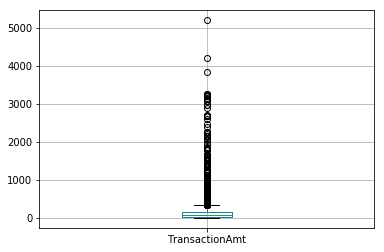

In [0]:
df_fraud.boxplot('TransactionAmt')

In [0]:
# df_fraud[df_fraud.TransactionAmt < 1000]['TransactionAmt'].hist()
# df_fraud[df_fraud.TransactionAmt < 1000]['ProductCD'].hist()
df_fraud.ProductCD.value_counts(), df.ProductCD.value_counts()

(W    8969
 C    8008
 H    1574
 R    1426
 S     686
 Name: ProductCD, dtype: int64, W    439670
 C     68519
 R     37699
 H     33024
 S     11628
 Name: ProductCD, dtype: int64)

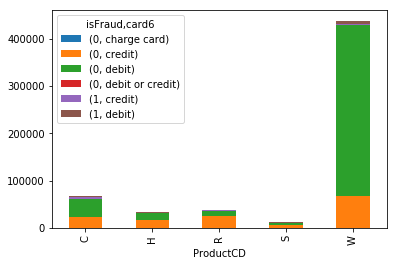

In [0]:
ct = pd.crosstab(df['ProductCD'], [df['isFraud'], df['card6']])
ct.plot(kind='bar', stacked=True)

In [0]:
df['isFraud'].as_matrix()

# df.drop('isFraud')
df.columns

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: FutureWarning: Method .as_matrix will be removed in a future version. Use .values instead.
  """Entry point for launching an IPython kernel.


Index(['TransactionID', 'isFraud', 'TransactionDT', 'TransactionAmt',
       'ProductCD', 'card1', 'card2', 'card3', 'card4', 'card5',
       ...
       'V330', 'V331', 'V332', 'V333', 'V334', 'V335', 'V336', 'V337', 'V338',
       'V339'],
      dtype='object', length=394)

In [0]:
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import StratifiedShuffleSplit



splitter = StratifiedShuffleSplit(n_splits=1, test_size=.2)


In [0]:
# !pip install category_encoders

In [0]:
target = 'isFraud'
features = df.columns.to_list()
features.remove(target)
# cat_features = df[features].select_dtypes(include=['category'])
cat_features = df[features].select_dtypes(include=['category'])
for f in cat_features:
  # print(dir(df[f].cat))
  print(df[f].cat.categories)
  if '-99' not in df[f].cat.categories:
    df[f].cat.add_categories('-99', inplace=True)
  df[f].fillna('-99', inplace=True)
df[set(features) - set(cat_features)].fillna(-99, inplace=True)
# cat_features = 



Index(['C', 'H', 'R', 'S', 'W', '-99'], dtype='object')
Index(['american express', 'discover', 'mastercard', 'visa'], dtype='object')
Index(['charge card', 'credit', 'debit', 'debit or credit'], dtype='object')
Index(['aim.com', 'anonymous.com', 'aol.com', 'att.net', 'bellsouth.net',
       'cableone.net', 'centurylink.net', 'cfl.rr.com', 'charter.net',
       'comcast.net', 'cox.net', 'earthlink.net', 'embarqmail.com',
       'frontier.com', 'frontiernet.net', 'gmail', 'gmail.com', 'gmx.de',
       'hotmail.co.uk', 'hotmail.com', 'hotmail.de', 'hotmail.es',
       'hotmail.fr', 'icloud.com', 'juno.com', 'live.com', 'live.com.mx',
       'live.fr', 'mac.com', 'mail.com', 'me.com', 'msn.com', 'netzero.com',
       'netzero.net', 'optonline.net', 'outlook.com', 'outlook.es',
       'prodigy.net.mx', 'protonmail.com', 'ptd.net', 'q.com',
       'roadrunner.com', 'rocketmail.com', 'sbcglobal.net', 'sc.rr.com',
       'servicios-ta.com', 'suddenlink.net', 'twc.com', 'verizon.net',
       'w

/usr/local/lib/python3.6/dist-packages/pandas/core/frame.py:4034: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  downcast=downcast, **kwargs)


{'TransactionID': '', 'TransactionDT': '', 'TransactionAmt': '', 'ProductCD': '', 'card1': '', 'card2': '', 'card3': '', 'card4': '', 'card5': '', 'card6': '', 'addr1': '', 'addr2': '', 'dist1': '', 'dist2': '', 'P_emaildomain': '', 'R_emaildomain': '', 'C1': '', 'C2': '', 'C3': '', 'C4': '', 'C5': '', 'C6': '', 'C7': '', 'C8': '', 'C9': '', 'C10': '', 'C11': '', 'C12': '', 'C13': '', 'C14': '', 'D1': '', 'D2': '', 'D3': '', 'D4': '', 'D5': '', 'D6': '', 'D7': '', 'D8': '', 'D9': '', 'D10': '', 'D11': '', 'D12': '', 'D13': '', 'D14': '', 'D15': '', 'M1': '', 'M2': '', 'M3': '', 'M4': '', 'M5': '', 'M6': '', 'M7': '', 'M8': '', 'M9': '', 'V1': '', 'V2': '', 'V3': '', 'V4': '', 'V5': '', 'V6': '', 'V7': '', 'V8': '', 'V9': '', 'V10': '', 'V11': '', 'V12': '', 'V13': '', 'V14': '', 'V15': '', 'V16': '', 'V17': '', 'V18': '', 'V19': '', 'V20': '', 'V21': '', 'V22': '', 'V23': '', 'V24': '', 'V25': '', 'V26': '', 'V27': '', 'V28': '', 'V29': '', 'V30': '', 'V31': '', 'V32': '', 'V33': '', '

NameError: ignored

In [0]:
X = df[features]
y = df[target]


X,y
# features, target
for train_index, test_index in splitter.split(X, y):
  print(test_index.shape, train_index.shape)
  X_train, X_test = X.iloc[train_index], X.iloc[test_index]
  y_train, y_test = y.iloc[train_index], y.iloc[test_index]

(118108,) (472432,)


In [0]:
X_train.head()

In [0]:
from category_encoders import BinaryEncoder, BackwardDifferenceEncoder, HashingEncoder, CatBoostEncoder

cols = df.columns.values
cats = ['ProductCD'] + [x for x in cols if (x.startswith(('card', 'M', 'addr')) or 'emaildomain' in x)]  

'''
1. ProductCD
2. card1 - card6
3. addr1, addr2
4. Pemaildomain Remaildomain
5. M1 - M9
'''

len(cols), len(cats)

from sklearn.preprocessing import StandardScaler
def encode_cats(X_train, cats=cats, y_train=None):
  X_train_ = X_train.drop(columns=cats)
  X_train_ = X_train_.fillna('-99')
  # X_train_ = StandardScaler(X_train_)
# BinaryEncoder()
# CatBoostEncoder()
  encoder = BinaryEncoder( )
  X_train_cats = encoder.fit_transform(X_train[cats], y_train)
  return pd.concat([X_train_, X_train_cats], axis=1)

In [0]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
# clf = LogisticRegression()
clf = LogisticRegression()
clf.fit(encode_cats(X_train, cats, y_train), y_train)
# score = clf.score(X_test, y_test.to_matrix())
preds = clf.predict(encode_cats(X_test, cats=cats))
print(classification_report(y_test, preds))

# print(score)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


ValueError: ignored

In [0]:
# !pip install category_encoders
from category_encoders import CatBoostEncoder

def run_model(model):
  model

# New Section